This tutorial requires the following:
    -pandas
    -scikit-learn
    -IPython with the IPython Notebook. 
These can be installed with pip by typing the following in terminal:

pip install numpy pandas sklearn ipython

git clone git://github.com/asharm17/aradhya-arbaz.github.io.git

In [241]:
# The pandas library is used for dataframe analysis and is helpful in
# retreiving the information from the csv file.
import pandas as pd 

# The matplotlib.pyplot library is used to create graphs and plot out
# the data from the dataframe.
import matplotlib.pyplot as plt

# The seaborn library is used to graph informative and statistical data
# into stylish and colorful charts, tables, and graphs. 
import seaborn as sns

# The pandas library is used for dataframe analysis and is helpful in
# retreiving the information from the csv file.
import pandas as pd

# The matplotlib.pyplot library is used to create graphs and plot out
# the data from the dataframe.
import matplotlib.pyplot as plt

# The numpy library is used to assist in storing data, scientific computing, and
# helpful array and dataset functions.
import numpy as np

# The metrics library helps with distance calculation, score functions, and 
# performance and pairwise metrics calculations.
from sklearn import metrics

# The ExtraTreesClassifier class uses a meta estimator that fits a number 
# of randomized decision trees on various sub-samples of the dataset and 
# uses averaging to improve the predictive accuracy.
from sklearn.ensemble import ExtraTreesClassifier

# The RFE class recursively considers smaller and smaller sets of features
# to select the appropriate features.
from sklearn.feature_selection import RFE

# The train_test_split class helpts split arrays or matrices into random 
# train and test subsets.
from sklearn.cross_validation import train_test_split

# The LogisticRegression class is a simple Logitic Regression (Logit, MaxEnt)
# classifier. It helps find the appropriate values for a Logistic Regression.
from sklearn.linear_model import LogisticRegression

/Users/asharm17/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-First we need to read the data from the file, which contains comma separated columns. 
-With the commands below we will first read the adult.csv file and create a dataframe to analyze after.
-We also drop any columns with missing values, or NaN cells.

In [242]:
# read the adult.csv file from the data folder
df = pd.read_csv("data/adult.csv")

# drop any columns with missing values, or NaN cells
df = df[df.occupation != '?']
df = df[df.occupation != '?']

# display the first few rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# Hypothesis

The prediction task is to determine whether a person makes over $50,000 a year, based on various features such as:
    -Occupation 
    -Work class/sector
    -Marital status
    -Race
    -Sex
    -Education.

# Analyze the data

Let’s start by plotting the distribution for a subset of features one by one and try to detect where the numbers lie, so that we can have a better understanding of what we have in our data, and if it will be skewed based on these numbers alone. This subset is taken based on the hypothesis.

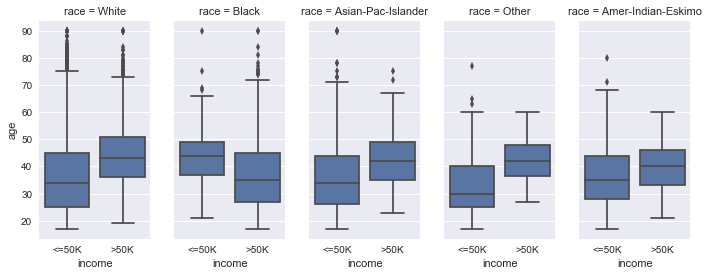

In [243]:
# Correlation of income with respect to age, disaggregated by race. 

# Create a seaborn FacetGrid using the values from the dataframe
g = sns.FacetGrid(df, col='race', size=4, aspect=.5)

# Use the values of 'income' and 'age' to map out a seaborn boxplot
g = g.map(sns.boxplot, 'income', 'age')
sns.plt.show()

The graphs above show the correlation between race and age. Analytically speaking, older White and Black individuals make more than their Asian-Pacific Islander and Native American counterparts. 

# Work Class

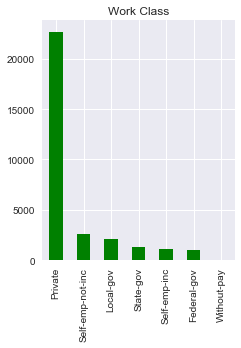

In [244]:
# Correlation of values with respect to Work Class.

# Create a figure of appropriate size and add a subplot to it
WorkClassP = plt.figure(figsize=(20,15))
workclass = WorkClassP.add_subplot(3, 5,1)

# Set the title to 'Work Class'
workclass.set_title('Work Class')

# Retrieve values from dataframe in 'workclass' and add them to the figure
df['workclass'].value_counts().plot(color = "green", kind="bar", axes=workclass)
plt.show()

Display the number of values with respect to each work class. We can see by this bar graph that the private sector is dominating the rest of the intervals by several thousands. So we should keep this in mind when we begin to classify our data later. 

# Marital Status

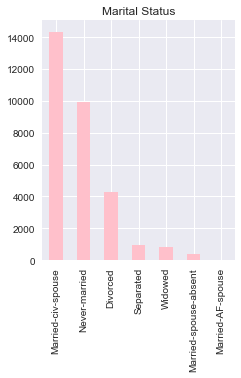

In [245]:
# Correlation of values with respect to Marital Status.

# Create a figure of appropriate size and add a subplot to it.
maritalStatus = plt.figure(figsize=(20,15))
mar = maritalStatus.add_subplot(3,5,1)

# Set the title of the figure to 'Marital Status'
mar.set_title('Marital Status')

# Retrieve values from dataframe in 'marital.status' and add them to the figure
df['marital.status'].value_counts().plot(color = "pink", kind="bar", axes=mar)
plt.show()

Display the number of values with respect to different categories of marital status. We can see by this bar graph that the Married-div-spouse category is dominating the rest of the intervals with Never-married and Divorced in second and third, respectively. So we should also keep this in mind when we begin to classify our data later.

# Sex

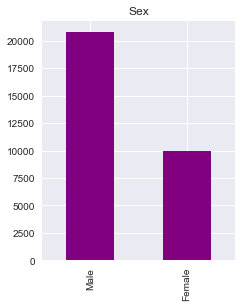

In [246]:
# Correlation of values with respect to Sex.

# Create a figure of appropriate size and add a subplot to it.
sexP = plt.figure(figsize=(20,15))
sex = sexP.add_subplot(3,5,1)

# Set the title to 'Sex'
sex.set_title('Sex')

# Retrieve values from dataframe in 'sex' and add them to the figure
df['sex'].value_counts().plot(color = "purple", kind="bar", axes=sex)
plt.show()

The plot clearly shows that Males have twice as much values than females. It shows the disparity between the two sexes. We should also keep this mind when we classify our data. Take a look at the violin plot below for a different graphic on this disparity:

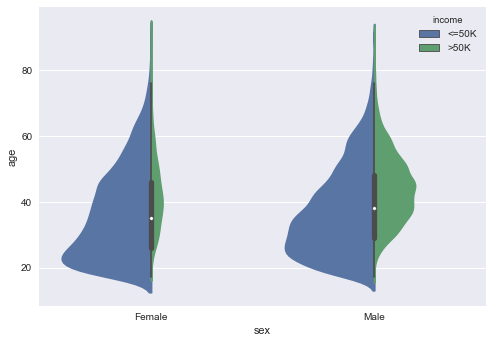

In [247]:
# This violin plot actually graphs the disparity that we noticed in the previous graph.
# It shows how males of all ages have a much larger income than their female counterparts.
sns.violinplot(x='sex', y='age', hue='income', data=df, split=True, scale='count')
sns.plt.show()

# How closely are income and occupation related?

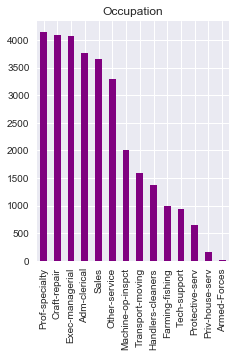

In [248]:
# Correlation of values with respect to occupation.

# Create a figure of appropriate size and add a subplot to it.
occP = plt.figure(figsize=(20,15))
oc = occP.add_subplot(3,5,1)

# Set the title to 'Occupation'
oc.set_title('Occupation')

# Retrieve values from the dataframe section 'occupation' and plot them.
df['occupation'].value_counts().plot(color = "purple", kind="bar", axes=oc)
plt.show()

The plot above shows how big a difference occupation makes. It also shows that occupations in the technological, managerial, or administrative level have significantly higher values than those in customer service and non-technical areas. This is another factor we should consider when we classify our data later.

### The plot below shows a glimpse at the earnings per occupation and which occupation has more members earning more than 50 k in relation to less.

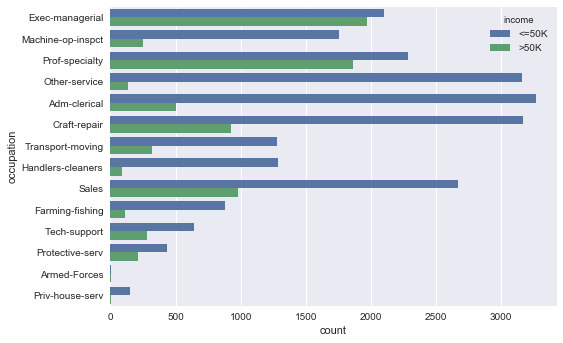

In [249]:
# Countplot is a histogram for 'occupation' across the 'income' variable from the data
sns.countplot(y='occupation', hue='income', data=df,)
sns.plt.show()

Again we see that the first plot out of the two essentially shows us where the numbers lie, but doesn't speak to us about where the data we want lies. It is although useful for understanding why data might be clumped where it is. The countplot however gives us a more relevant representation of which occupation may have the highest number of >50k members.

# How closely are income and education related? 

### Education Num

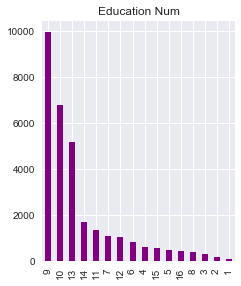

In [250]:
# Correlation of values with respect to educational years.

# Create a figure of appropriate size and add a subplot to it.
educP = plt.figure(figsize=(20,15))
edu = educP.add_subplot(3,5,1)

# Set its title to 'Education Num'
edu.set_title('Education Num')

# Retrieve values from 'education.num' in the dataframe and plot them.
df['education.num'].value_counts().plot(color = "purple", kind="bar", axes=edu)
plt.show()

This plot shows the distribution of values and years of education. It clearly shows that 9 - 10 years of education (i.e. high school) is the highest because that is the most common.

### Education

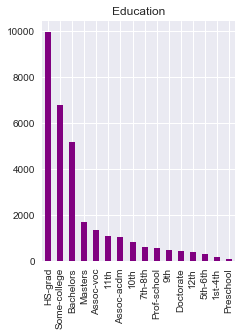

In [251]:
# Correlation of values with respect to highest level of education.

# Create a figure of appropriate size and add a subplot to it.
educP = plt.figure(figsize=(20,15))
eduN = educP.add_subplot(3,5,1)

# Set its title to 'Education'
eduN.set_title('Education')

# Retrieve the values from 'education' in the dataframe and plot them.
df['education'].value_counts().plot(color = "purple", kind="bar", axes=eduN)
plt.show()

We should notice that the high school graduates are the greatest numerically in this dataset, which should be considered when analyzing the violin plot beneath as well. Since the data clumps around the 9.0 region which denotes around 9 years of education.

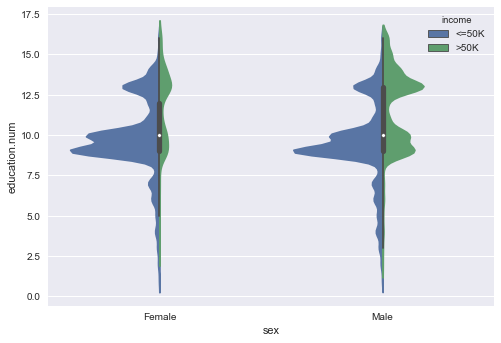

In [252]:
# This violin plot actually graphs the disparity between the two sexes that we noticed earlier,
# but this time, it does so in terms of years of education, where as previously it did so in 
# terms of age.
sns.violinplot(x='sex', y='education.num', hue='income', data=df, split=True, scale='count')
sns.plt.show()

Then we check the countplot below and realize that despite being greatest in numbers, members who only graduated from high school actually have the lowest numbers within the greater than 50k pool. This renders our bar graphs and violin plot useless in checking for correlation between education and income greater than and equal to 50k, but now we can keep in mind that the dataset contains a majority in high school only graduates.

We can also keep in mind that the count plot below shows a strong correlation in lower education and lower income.

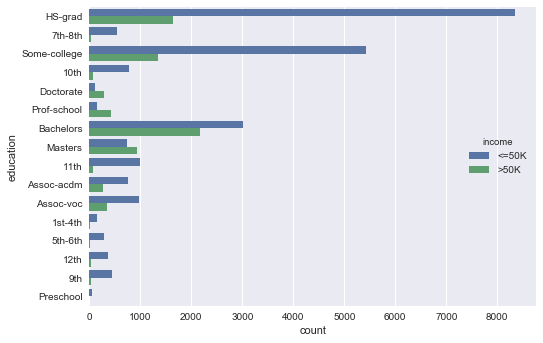

In [253]:
sns.countplot(y='education', hue='income', data=df,)
sns.plt.show()

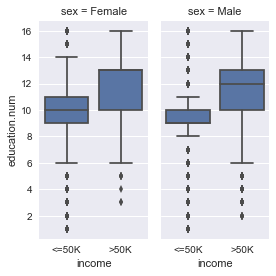

In [254]:
# How years of education correlate to income, disaggregated by sex. 
# More education also does not result in the same gains in income for women compared to men.
g = sns.FacetGrid(df, col='sex', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'education.num')
sns.plt.show()

# How closely are race and income related?

### Race

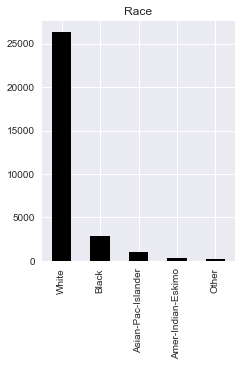

In [255]:
# Correlation of values with respect to race.

# Create a figure of appropriate size and add a subplot to it.
raceP = plt.figure(figsize=(20,15))
race = raceP.add_subplot(3,5,1)

# Set its title to 'Race'
race.set_title('Race')

# Retrieve values from 'race' category in the dataframe and plot them
df['race'].value_counts().plot(color = "black", kind="bar", axes=race)
plt.show()

This one should be kept in mind, as caucasians are dominating in this sector by a massive margin.

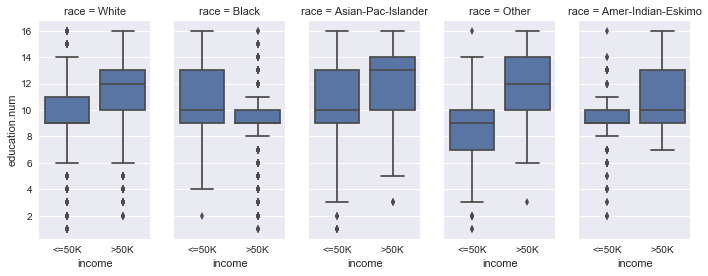

In [256]:
# The seaborn FacetGrid here will show income with regards to number of years
# of education, rather than age.
g = sns.FacetGrid(df, col='race', size=4, aspect=.5)

# The values from the dataframe are then mapped to a boxplot to show the distribution.
g = g.map(sns.boxplot, 'income', 'education.num')
sns.plt.show()

Another correlation we can notice, in majority of the cases we see that more years of education among races shows more members among the > 50k, but we can also notice that more education does not result in the same gain in income for Asian Americans/Pacific Islanders and Native Americans compared to Caucasians.

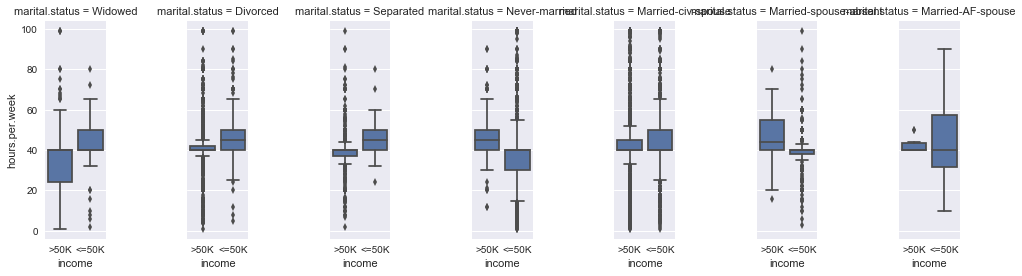

In [257]:
# How hours worked per week correlates to income, disaggregated by marital status.

# Similar to the previous graphs, we can create another map based on marital status
# instead of race, with regards to hours per week.
g = sns.FacetGrid(df, col='marital.status', size=4, aspect=.5)
g = g.map(sns.boxplot, 'income', 'hours.per.week')

sns.plt.show()

Generall speaking, the graphs show that income is higher for individuals who work more hours per week, with the exception of people who fall under the categories 'Never-married' and 'Married-spouse-absent'. 

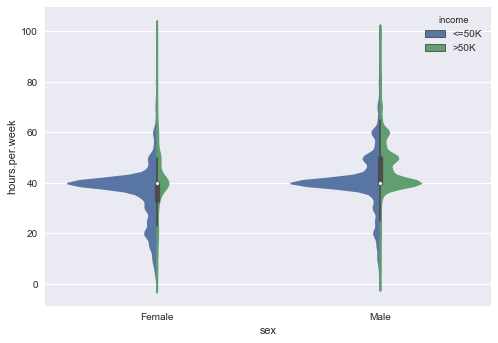

In [258]:
# This violin plot again shows the disparity between the two sexes that we noticed earlier,
# but this time, it does so in terms of hours per week, where as previously it did so in 
# terms of years of education.
sns.violinplot(x='sex', y='hours.per.week', hue='income', data=df, split=True, scale='count')
sns.plt.show()

Finally, the violin plot above shows that yet again, males have higher incomes than their female counterparts regardless of number of hours per week. We noticed this trend in all of the other violin plots as well where males had higher values despite the dependent variable.

In [259]:
# Map out all different values of the category 'workclass' in the dataframe and add
# a column named 'workclass_num' to the dataframe which contains respective integer values 
# for the different working classes.
df['workclass_x'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 
                                        'Self-emp-not-inc':3, 'Self-emp-inc':4, 
                                        'Local-gov':5, 'Without-pay':6})

In [260]:
# Find all instances in the dataframe where the income is greater than 50K and 
# add a columb named 'over50K' to the dataframe which contains integer values for
# determining if the person has an income higher than 50K or not.
df['over50K'] = np.where(df.income == '<=50K', 0, 1)

In [261]:
# Map out all different values of the category 'marital.status' in the dataframe
# and add a column named 'marital_num' to the dataframe which contains respective
# integer values for the different marital statuses.
df['marital_x'] = df['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 
                                              'Never-married':3, 'Married-civ-spouse':4, 
                                              'Married-AF-spouse':4, 'Married-spouse-absent':5})

In [262]:
# Map out all different values of the cateogry 'race' in the dataframe and add a
# column named 'race_num' to the dataframe which contains respective integer values
# for the different races.
df['race_x'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 
                              'Amer-Indian-Eskimo':3, 'Other':4})

In [263]:
# Find all instances in the dataframe where the sex of the individual is Female and
# add a column named 'sex_num' to the dataframe which contains integer values determining
# if the person is Female or not.
df['sex_x'] = np.where(df.sex == 'Female', 0, 1)

In [264]:
# Map out all different values of the category 'relationship' in the dataframe and add
# a column named 'rel_num' to the dataframe.
df['rel_x'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 
                                     'Other-relative':0, 'Husband':1, 'Wife':1})

In [265]:
# Show the whole dataframe (with the added columns)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,capital.loss,hours.per.week,native.country,income,workclass_x,over50K,marital_x,race_x,sex_x,rel_x
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,4356,18,United-States,<=50K,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,3900,40,United-States,<=50K,0,0,1,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,3900,40,United-States,<=50K,0,0,2,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,3770,45,United-States,<=50K,0,0,1,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,3770,40,United-States,<=50K,0,0,2,0,1,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,...,3683,20,United-States,>50K,1,1,3,0,0,0
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,...,3683,40,United-States,<=50K,2,0,1,0,0,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,...,3004,60,?,>50K,0,1,3,0,1,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,...,3004,35,United-States,>50K,0,1,1,1,0,0
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,...,2824,45,United-States,>50K,3,1,3,0,1,0


As we can see from the dataframe above, new columns have been added. The actual dataframe itself has been updated to include the columns: 'workclass_num', 'over50K', 'marital_num', 'race_num', 'sex_num', and 'rel_num'. These are the columns we just created in the previous code blocks.

In [266]:
# X variable will be all the numerical values from the new columns we just added as well as
# capital.gain and capital.loss. 
X = df[['workclass_x', 'education.num', 'marital_x', 'race_x', 'sex_x', 'rel_x', 'capital.gain', 'capital.loss']]

# y variable will just be values where people have more than 50K income.
y = df.over50K

In [267]:
# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 3)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
rfe.support_
rfe.ranking_

array([4, 1, 2, 3, 1, 1, 6, 5])

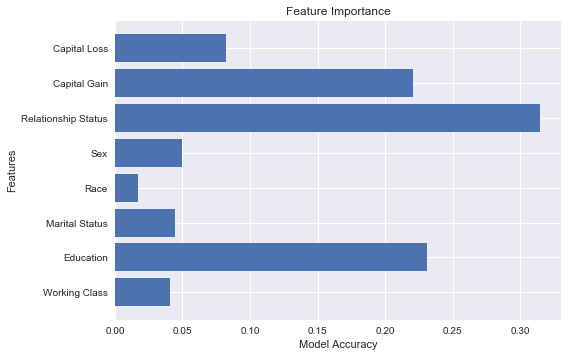

In [268]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')

# Add a title to the graph and name the x and y axes respectively.
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")

# add the different values for the y axis.
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 
                 'Relationship Status', 'Capital Gain', 'Capital Loss'))

# Set the overall value and display the graph
plt.grid(True)
plt.show()

In [269]:
# We can now quickly sample a training set while testing (evaluating) our classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [270]:
# instantiate logreg as a LogisticRegression object
logreg = LogisticRegression()

# Fit the model according to the given training data and return logreg (itself)
# with updated model.
logreg.fit(X_train, y_train)

# Predict class labels for samples in X_test and return an array of class labels
# for each sample in X_test.
y_pred = logreg.predict(X_test)

# Get the accuracy classification score by computing subset accuracy: the set of 
# labels predicted for a sample (y_pred) must exactly match the corresponding 
# set of labels in y_test.
metrics.accuracy_score(y_test, y_pred)

0.83333333333333337

## Analysis

The accuracy classification final score above is approximately 0.833. Comparitively, this is a decently accurate rating between our predicted labels and the correct ones. Therefore, it shows that our logistic regression was successful in fitting the our training sets to the logistic regression model.

## Other Resources

1. https://www.kaggle.com/uciml/adult-census-income
2. https://archive.ics.uci.edu/ml/datasets/Census+Income
3. https://mathematicaforprediction.wordpress.com/2014/03/30/classification-and-association-rules-for-census-income-data/
4. http://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/
5. https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf